<h4> Session 7 </h4>

<h3><i><b>Analysis of CODE1</b></i></h2>
<I>

---


**Target:**

*   Basic code setup with Data Loaders / Sample Architecture / Predictions + Validation
*   No check of parameters or augumenters taken care at this step


**Results:**<br>

*   Epochs - 15
*   Parameters - 6.3M
*   Best Train Acc -  99.86(LAST epoch)
*   Best Test Acc  - 99.14(LAST epoch)
*   Train/Test Acc last layer - (Difference - 0.72)


**Analysis:**<br>


*   Training logs shows sign of overfitting.
*   The model is large in terms of capacity(parameter count) making it more complex.
*   Since there are no transforms being done trained model becomes biased to train images which might not be actual representation of true conditions.


---


### Imports <hr>

In [1]:
# Pytorch imports
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torchsummary import summary

import sys
sys.path.append('../')

# Loading classes from py files
from model import Net, ModelTraining
from utils import Utility

Class Object Initialization

In [2]:
# creating class objects
get_utilitites= Utility()

model_train = ModelTraining()

##### Check device support CPU/GPU <hr> 

In [3]:
device = Utility.set_cuda_if_available()
print(f'Device available for the script - {device}')

CUDA Available? <function is_available at 0x0000021BFF2F3E20>
Device available for the script - cuda


##### Define dataset class for creating train/test loaders <hr>


In [4]:
class Dataset():
    """
    This class defines the train/test transforms for our CNN model for MNIST dataset
    """
    def __init__(self, batch_size):
        
        self.batch_size = batch_size
        self.kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 2, 'pin_memory': True}

        self.train_transforms = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize((0.1307,), (0.3081,)),
            ])

        # Test data transformations
        self.test_transforms = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize((0.1307,), (0.3081,))
            ])

    def train_loader(self):
        train = datasets.MNIST('../data', train=True, download=True, transform=self.train_transforms)
        return torch.utils.data.DataLoader(train, **self.kwargs)

    def test_loader(self):
        test = datasets.MNIST('../data', train=False, download=True, transform=self.test_transforms)
        return torch.utils.data.DataLoader(test, **self.kwargs)

##### Create Batch loader for train/test dataset  <hr>

In [5]:
get_data = Dataset(batch_size=256)

train_loader = get_data.train_loader()
test_loader = get_data.test_loader()

##### View sample images from the train loader  <hr>



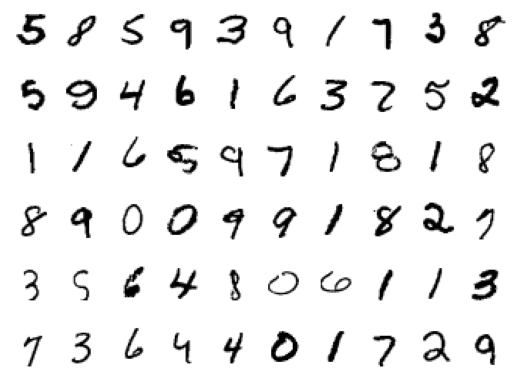

In [6]:
get_utilitites.plot_grid(train_loader)

##### CNN Model summary  <hr>


In [7]:
model = Net().to(device)
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 28, 28]             320
            Conv2d-2           [-1, 64, 28, 28]          18,496
         MaxPool2d-3           [-1, 64, 14, 14]               0
            Conv2d-4          [-1, 128, 14, 14]          73,856
            Conv2d-5          [-1, 256, 14, 14]         295,168
         MaxPool2d-6            [-1, 256, 7, 7]               0
            Conv2d-7            [-1, 512, 5, 5]       1,180,160
            Conv2d-8           [-1, 1024, 3, 3]       4,719,616
            Conv2d-9             [-1, 10, 1, 1]          92,170
Total params: 6,379,786
Trainable params: 6,379,786
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 1.51
Params size (MB): 24.34
Estimated Total Size (MB): 25.85
-------------------------------------

#### Let's Train and test our model
---


In [8]:
# variable for model and training
num_epochs = 15
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  model_train.train(model, device, train_loader, optimizer)
  model_train.test(model, device, test_loader)


Epoch 1


  0%|          | 0/235 [00:00<?, ?it/s]


Test set: Average loss: 0.0901, Accuracy: 9714/10000 (97.14%)

Epoch 2


  0%|          | 0/235 [00:00<?, ?it/s]


Test set: Average loss: 0.0569, Accuracy: 9809/10000 (98.09%)

Epoch 3


  0%|          | 0/235 [00:00<?, ?it/s]


Test set: Average loss: 0.0385, Accuracy: 9872/10000 (98.72%)

Epoch 4


  0%|          | 0/235 [00:00<?, ?it/s]


Test set: Average loss: 0.0325, Accuracy: 9887/10000 (98.87%)

Epoch 5


  0%|          | 0/235 [00:00<?, ?it/s]


Test set: Average loss: 0.0346, Accuracy: 9889/10000 (98.89%)

Epoch 6


  0%|          | 0/235 [00:00<?, ?it/s]


Test set: Average loss: 0.0378, Accuracy: 9876/10000 (98.76%)

Epoch 7


  0%|          | 0/235 [00:00<?, ?it/s]


Test set: Average loss: 0.0278, Accuracy: 9905/10000 (99.05%)

Epoch 8


  0%|          | 0/235 [00:00<?, ?it/s]


Test set: Average loss: 0.0355, Accuracy: 9873/10000 (98.73%)

Epoch 9


  0%|          | 0/235 [00:00<?, ?it/s]


Test set: Average loss: 0.0271, Accuracy: 9903/10000 (99.03%)

Epoch 10


  0%|          | 0/235 [00:00<?, ?it/s]

  0%|          | 0/235 [00:00<?, ?it/s]

  0%|          | 0/235 [00:00<?, ?it/s]


Test set: Average loss: 0.0296, Accuracy: 9899/10000 (98.99%)

Epoch 11

Test set: Average loss: 0.0299, Accuracy: 9900/10000 (99.00%)

Epoch 12

Test set: Average loss: 0.0284, Accuracy: 9919/10000 (99.19%)

Epoch 13


  0%|          | 0/235 [00:00<?, ?it/s]


Test set: Average loss: 0.0358, Accuracy: 9910/10000 (99.10%)

Epoch 14


  0%|          | 0/235 [00:00<?, ?it/s]


Test set: Average loss: 0.0296, Accuracy: 9920/10000 (99.20%)

Epoch 15


  0%|          | 0/235 [00:00<?, ?it/s]


Test set: Average loss: 0.0335, Accuracy: 9914/10000 (99.14%)



Plot the Loss/Accuracy for Train/Test dataset

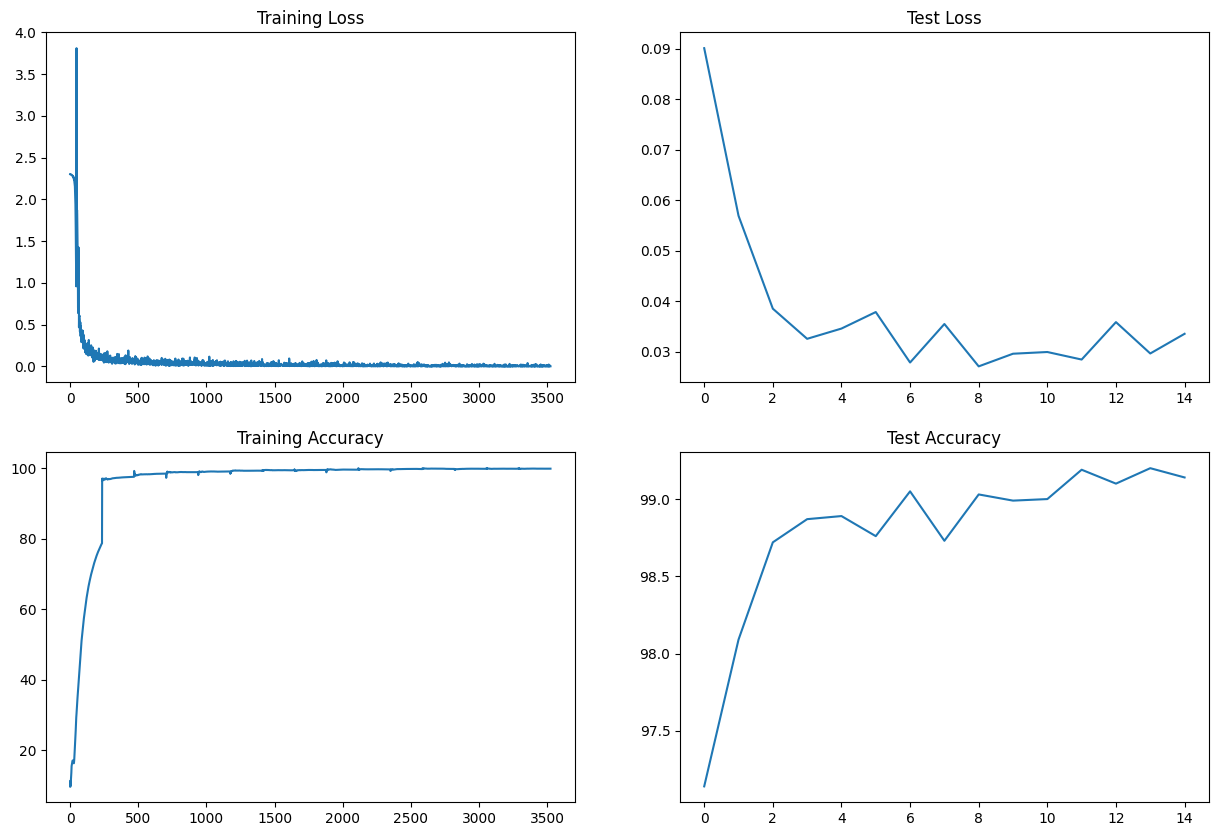

In [9]:
# CODE MOVED TO UTILS.PY

model_train.plot_loss_accuracy()